## Constructing a Markov Transition Matrix from DNA Sequences

### Objective
> **[2 Marks]**  
You have learned the key differences between a simple **dinucleotide frequency model** and a **Markov model**.  
Your task is to build a **1st-order Markov transition matrix** from input DNA sequences. This matrix should capture the probability of transitioning from one nucleotide (A, T, G, C) to another, and should be **printed and visualized** as part of this notebook.

---

### Our Approach

1. **Parse Sequences from a FASTA File**  
   We will read a multi-sequence FASTA file, storing each sequence independently. FASTA headers (lines starting with `>`) indicate new sequences.  

2. **Count Transitions Between Nucleotides**  
   For each sequence, we scan nucleotide pairs (e.g., A→T, G→C) to build a transition count table.

3. **Normalize to Probabilities**  
   We convert the raw counts into probabilities for each nucleotide, ensuring each row of the matrix sums to 1.

4. **Visualize with a Heatmap**  
   Finally, we display the transition matrix using a color-coded heatmap for easier interpretation.

---

### Why Use `defaultdict` for the Transition Matrix?

Instead of using lists or nested arrays to store transition counts, we use Python’s `defaultdict(int)` for the following reasons:

- **Efficient for Large Data**  
  When working with genomic-scale sequences (e.g., human chromosome 1 ~220 million bases), `defaultdict` avoids pre-allocating unnecessary space for zero entries — unlike full matrices.

- **Cleaner Code**  
  Keys are automatically initialized to 0, so we can increment transitions directly without condition checks (`counts['A']['T'] += 1`).

- **Scalable and Sparse**  
  Memory usage stays minimal, especially when not all transitions are observed (common in short or filtered sequences).

- **Fast Lookups and Updates**  
  Transition updates are done in constant time (`O(1)`), which is critical when processing millions of base pairs.

---

Using this efficient and biologically intuitive structure, we proceed to read the sequences and construct the Markov transition matrices.


In [1]:
import pandas as pd
from collections import defaultdict

def build_markov_transition_matrix(sequence):
    """
    Builds a 1st-order Markov transition matrix for a given DNA sequence.
    
    Parameters:
    - sequence (str): DNA sequence consisting of bases A, T, G, and C.
    
    Returns:
    - pd.DataFrame: Transition probability matrix where rows represent the
      current base and columns represent the next base.
    """
    sequence = sequence.upper()
    valid_bases = "ATGC"  # Consider only standard DNA bases
    
    # Initialize transition counts for each base pair
    counts = {from_base: defaultdict(int) for from_base in valid_bases}
    
    # Count occurrences of each base transition (e.g., A → T), this can be done in a single pass, in O(n) time
    # by iterating through the sequence and updating counts for each pair of bases
    for i in range(len(sequence) - 1):
        a, b = sequence[i], sequence[i+1]
        if a in valid_bases and b in valid_bases:
            counts[a][b] += 1
    
    # Convert transition counts to probabilities
    matrix_data = {}
    for a in valid_bases:
        total = sum(counts[a].values())
        matrix_data[a] = [
            round(counts[a][b] / total, 4) if total > 0 else 0.0 for b in valid_bases
        ]
    
    # Create a DataFrame with the transition probabilities
    df = pd.DataFrame(matrix_data, index=list(valid_bases))
    df.index.name = "From\\To"
    
    print("Markov Transition Matrix (1st Order):\n")
    print(df)

# Example usage
sequence = "ATGCGATATC"
build_markov_transition_matrix(sequence)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\SRIVARDHAN\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\SRIVARDHAN\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\SRIVARDHAN\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start

AttributeError: _ARRAY_API not found

Markov Transition Matrix (1st Order):

           A       T    G    C
From\To                       
A        0.0  0.3333  0.5  0.0
T        1.0  0.0000  0.0  0.0
G        0.0  0.3333  0.0  1.0
C        0.0  0.3333  0.5  0.0


In [2]:
# In the above code, we have built a transition matrix for a DNA sequence, provided as a string.
# The function below does the same but reads sequences from a multi-line FASTA file instead.


import seaborn as sns
import matplotlib.pyplot as plt

def read_fasta_sequences(filepath):
    """
    Reads a multi-line FASTA file and returns each sequence separately.
    
    Parameters:
    - filepath (str): Path to the FASTA file.
    
    Returns:
    - dict: Dictionary where keys are sequence headers and values are DNA sequences.
    """
    sequences = {}
    header = None
    sequence = ''
    
    with open(filepath, 'r') as f:
        for line in f:
            line = line.strip() # Strip whitespace
            if line.startswith(">"):  # New sequence begins
                if header: # Save the previous sequence
                    sequences[header] = sequence
                header = line[1:]  # Strip the '>' character
                sequence = ''
            else:
                sequence += line # Append the sequence line to the current sequence
        
        if header:
            sequences[header] = sequence
    return sequences



# The following function builds a Markov transition matrix for each sequence in the FASTA file.
def build_markov_transition_matrix(sequence):
    """
    Builds a 1st-order Markov transition matrix for a given DNA sequence.
    
    Parameters:
    - sequence (str): DNA sequence consisting of bases A, T, G, and C.
    
    Returns:
    - pd.DataFrame: Transition probability matrix where rows represent the
      current base and columns represent the next base.
    """
    sequence = sequence.upper()
    valid_bases = "ATGC"
    
    counts = {from_base: defaultdict(int) for from_base in valid_bases}
    
    for i in range(len(sequence) - 1):
        a, b = sequence[i], sequence[i+1]
        if a in valid_bases and b in valid_bases:
            counts[a][b] += 1
    
    matrix_data = {}
    for a in valid_bases:
        total = sum(counts[a].values())
        matrix_data[a] = [
            round(counts[a][b] / total, 4) if total > 0 else 0.0 for b in valid_bases
        ]
    
    df = pd.DataFrame(matrix_data, index=list(valid_bases))
    df.index.name = "From\\To"
    return df

# The following function plots the Markov transition matrix as a heatmap using seaborn.
def plot_markov_transition_heatmap(df):
    """
    Plots a heatmap from a Markov transition matrix.
    
    Parameters:
    - df (pd.DataFrame): Transition probability matrix.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(df, annot=True, cmap="YlGnBu", cbar=True, fmt='.2f',
                xticklabels=df.columns, yticklabels=df.index, linewidths=0.5)
    
    plt.title("Markov Transition Matrix Heatmap")
    plt.xlabel("To Base")
    plt.ylabel("From Base")
    plt.tight_layout()
    plt.show()




Markov Transition Matrices for the first 5 sequences from the FASTA file:


▶ Markov Transition Matrix for Sequence: 1
              A       T       G       C
From\To                                
A        0.2766  0.3103  0.1605  0.3182
T        0.2128  0.2529  0.3333  0.1932
G        0.3085  0.2184  0.1728  0.2159
C        0.2021  0.2184  0.3333  0.2727


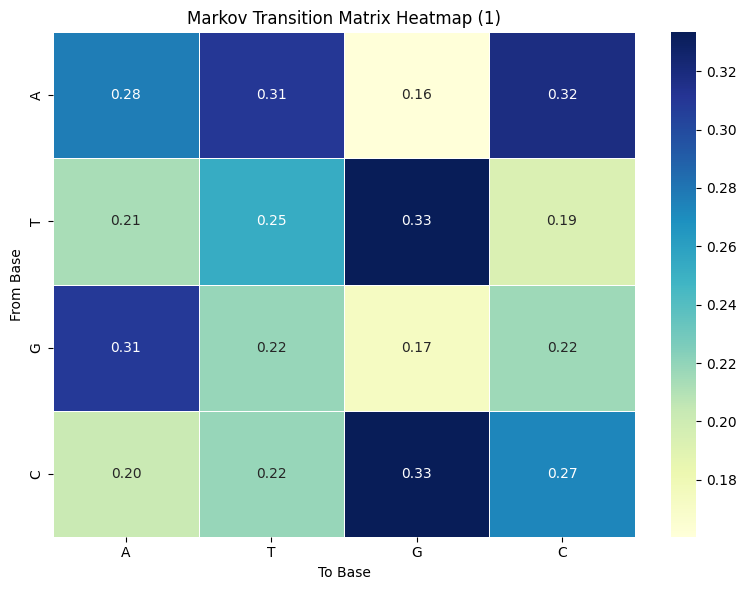


▶ Markov Transition Matrix for Sequence: 2
              A       T       G       C
From\To                                
A        0.2184  0.2805  0.2778  0.2917
T        0.2414  0.2561  0.2222  0.2778
G        0.2529  0.2317  0.3111  0.2778
C        0.2874  0.2317  0.1889  0.1528


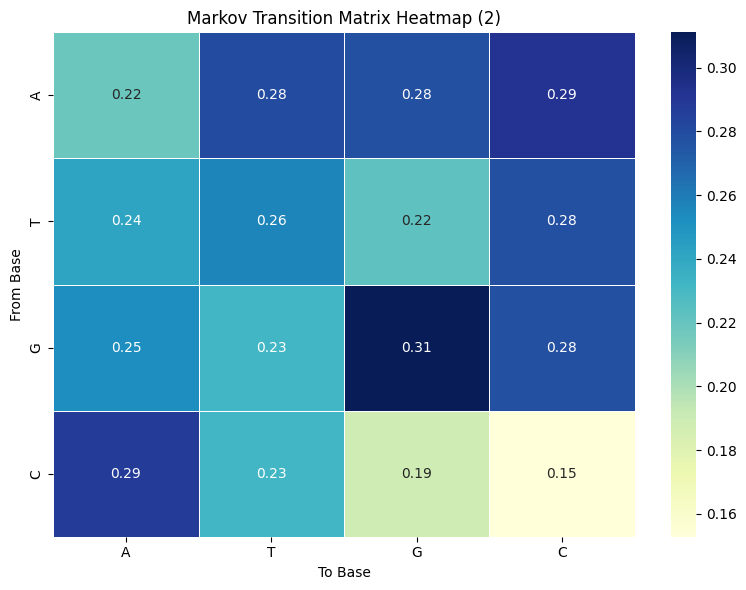


▶ Markov Transition Matrix for Sequence: 3
              A       T       G       C
From\To                                
A        0.2564  0.3425  0.2131  0.3030
T        0.2949  0.1781  0.2295  0.3485
G        0.1923  0.2466  0.2787  0.1515
C        0.2564  0.2329  0.2787  0.1970


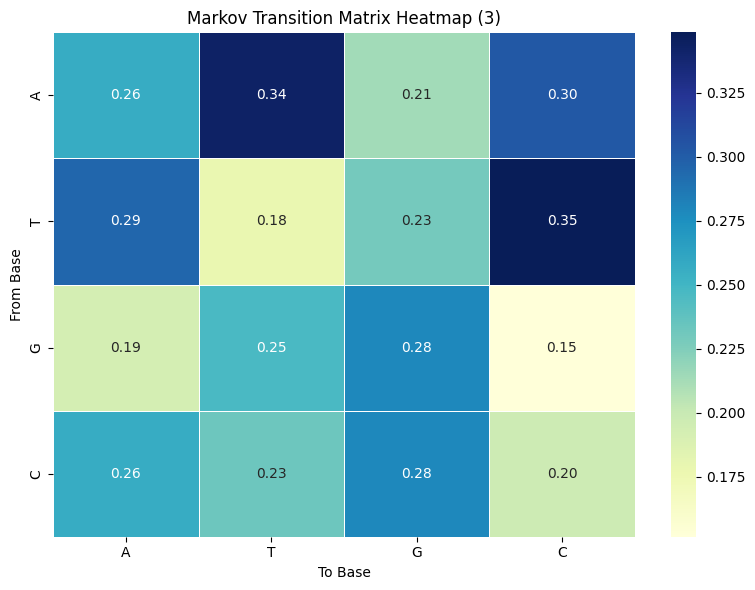


▶ Markov Transition Matrix for Sequence: 4
           A       T       G       C
From\To                             
A        0.2  0.4444  0.1818  0.2222
T        0.2  0.1111  0.4545  0.1111
G        0.4  0.2222  0.2727  0.2222
C        0.2  0.2222  0.0909  0.4444


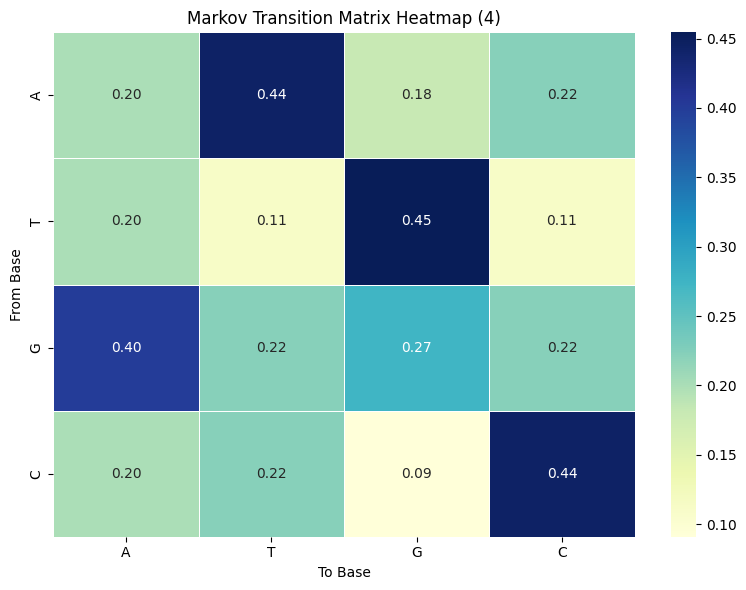

In [3]:
# Let's read a multi-line FASTA file and build Markov transition matrices for each sequence.

fasta_file = "multiline_input.fasta"  
sequences = read_fasta_sequences(fasta_file)


import os

# Create an output directory
os.makedirs("outputs", exist_ok=True)

print("Markov Transition Matrices for the first 5 sequences from the FASTA file:\n")

# Limit output to the first 4 sequences
for i, (header, seq) in enumerate(sequences.items()):
    if i >= 4:
        break
    
    print(f"\n▶ Markov Transition Matrix for Sequence: {header}")
    df = build_markov_transition_matrix(seq)
    print(df)

    # Save matrix as CSV
    matrix_filename = f"outputs/matrix_{i+1}.csv"
    df.to_csv(matrix_filename)
    
    # Save heatmap as PNG
    plt.figure(figsize=(8, 6))
    sns.heatmap(df, annot=True, cmap="YlGnBu", cbar=True, fmt='.2f',
                xticklabels=df.columns, yticklabels=df.index, linewidths=0.5)
    plt.title(f"Markov Transition Matrix Heatmap ({header[:20]})", fontsize=12)
    plt.xlabel("To Base")
    plt.ylabel("From Base")
    plt.tight_layout()
    
    heatmap_filename = f"outputs/heatmap_{i+1}.png"
    plt.savefig(heatmap_filename, dpi=300)
    plt.show()
    plt.close()
    
    
# The above code reads a multi-line FASTA file, builds Markov transition matrices for the first 4 sequences,
# and saves the matrices as CSV files and the heatmaps as PNG files in an "outputs" directory.


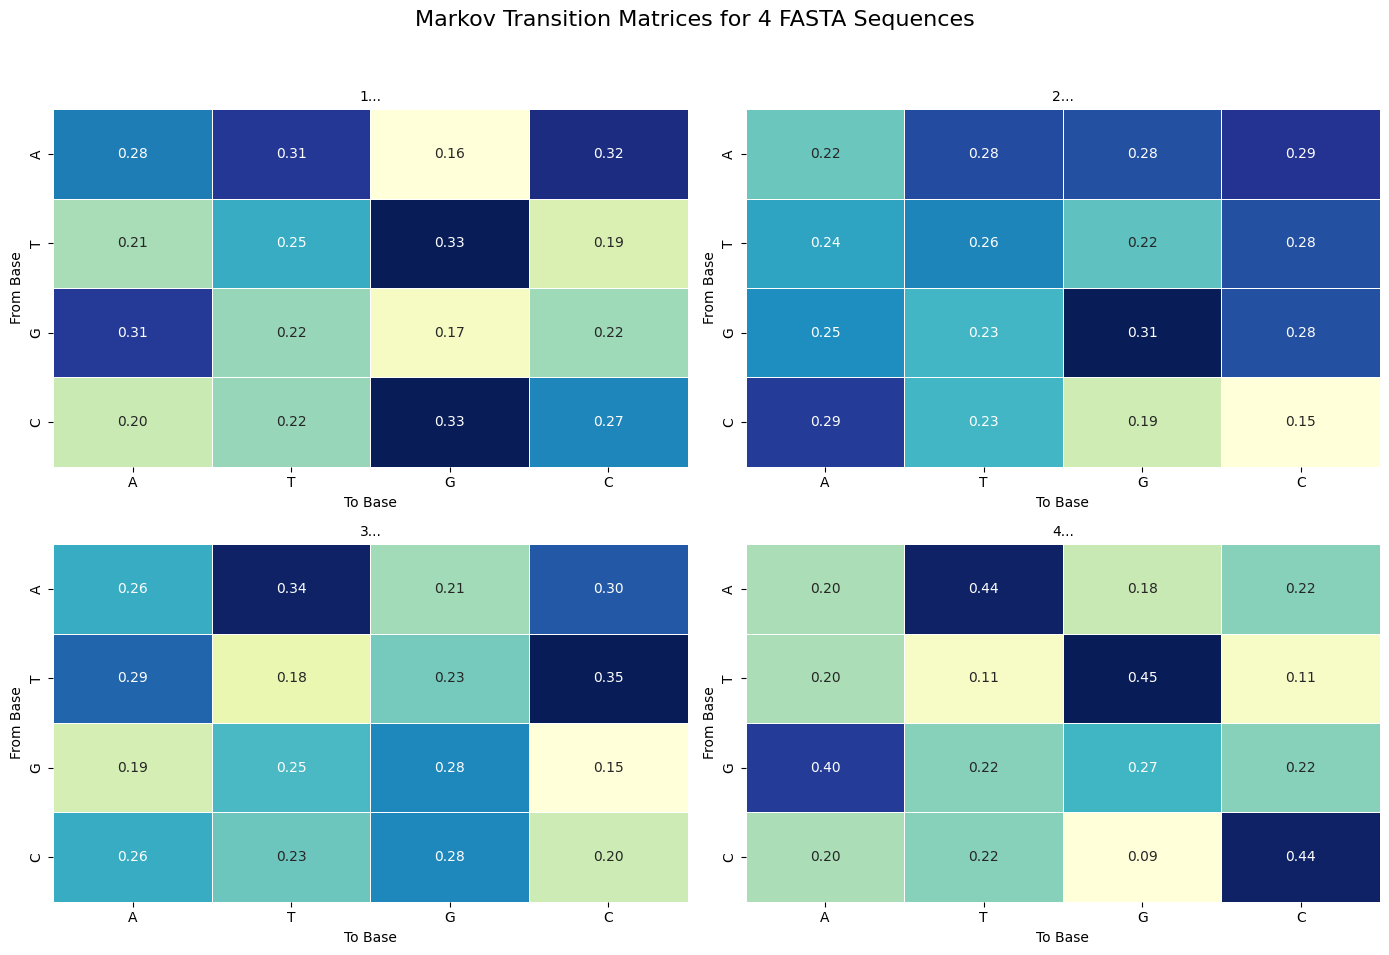

In [4]:
import matplotlib.pyplot as plt

# Load saved transition matrices
matrices = []
headers = []

for i, (header, seq) in enumerate(sequences.items()):
    if i >= 4:
        break
    df = build_markov_transition_matrix(seq)
    matrices.append(df)
    headers.append(header)

# Plot all 4 heatmaps together
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Markov Transition Matrices for 4 FASTA Sequences", fontsize=16)

for idx, ax in enumerate(axes.flat):
    sns.heatmap(matrices[idx], annot=True, cmap="YlGnBu", fmt=".2f",
                xticklabels=matrices[idx].columns, yticklabels=matrices[idx].index,
                linewidths=0.5, ax=ax, cbar=False)
    ax.set_title(f"{headers[idx][:25]}...", fontsize=10)
    ax.set_xlabel("To Base")
    ax.set_ylabel("From Base")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("outputs/combined_heatmaps.png", dpi=300)
plt.show()
# The above code loads the saved transition matrices and plots all 4 heatmaps together in a single figure.
